###Title:
*Understanding Market Basket Analysis with the Apriori Algorithm*

### Introduction:
Market Basket Analysis is a powerful technique in the field of data mining that aims to uncover patterns and associations within transactional datasets. One of the key algorithms used for this purpose is the Apriori algorithm. This algorithm plays a crucial role in identifying relationships between items purchased together, providing valuable insights for businesses in various domains.

### Method/Working:
The Apriori algorithm follows a systematic approach to discovering frequent itemsets and generating association rules:

1. *Frequent Itemset Generation:*
   - The algorithm begins by identifying frequent itemsets, which are sets of items that frequently appear together in transactions.
   - It starts with individual items and progressively explores larger itemsets, determining their frequency against a specified threshold (minimum support).

2. *Join Step:*
   - During each iteration, the algorithm joins pairs of known frequent itemsets to create larger candidate itemsets.
   - For instance, if items {A} and {B} are found to be frequent, the algorithm combines them to create the candidate itemset {A, B}.

3. *Prune Step:*
   - After joining, the algorithm prunes candidate itemsets by checking if their subsets are also frequent.
   - If a subset is not frequent, the candidate itemset is eliminated, reducing the search space and enhancing computational efficiency.

4. *Repeat:*
   - Steps 2 and 3 are repeated iteratively until no more frequent itemsets can be generated.

5. *Association Rule Generation:*
   - Once frequent itemsets are identified, association rules are generated based on these itemsets.
   - Association rules have the form A => B, representing relationships between items. These rules are characterized by measures such as support, confidence, and lift.

6. *Rule Evaluation and Selection:*
   - The generated rules are evaluated based on user-specified criteria, such as minimum confidence and minimum lift.
   - Rules meeting the criteria are considered interesting and actionable, providing valuable insights for businesses.

In the context of market basket analysis, the Apriori algorithm allows businesses to uncover meaningful associations between products, enabling them to make informed decisions related to product placement, marketing strategies, and customer preferences.

This methodical approach to analyzing transactional data has proven to be invaluable in retail, e-commerce, and various industries where understanding customer behavior and purchasing patterns is critical for business success.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Imported")

Imported


In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
file.isna().sum()

Member_number      0
Date               0
itemDescription    0
Year               0
Month-Year         0
dtype: int64


Data Collection


In [ ]:
file=pd.read_csv('/content/Groceries_dataset.csv')
file.head(20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [ ]:
file.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

Splitting the data into features and lables

In [ ]:
x=file["itemDescription"].value_counts().sort_values(ascending=False)[:10]


In [ ]:
x

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

Graphical Representation


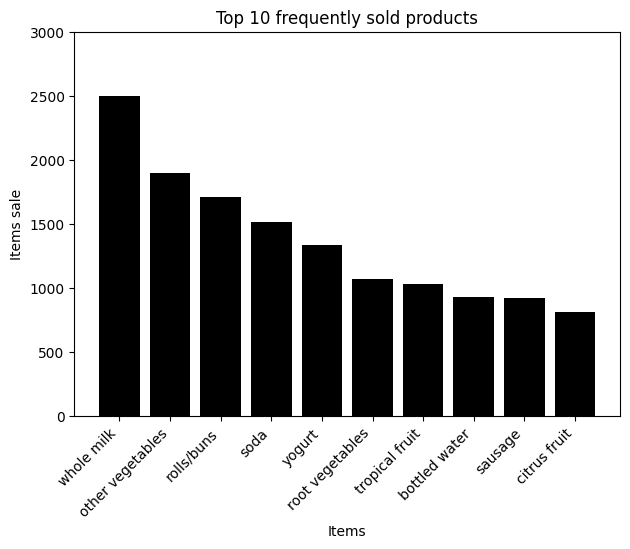

In [ ]:
plt.bar(x.index,x.values,color="black")
plt.xlabel("Items")
plt.ylabel("Items sale")
plt.ylim(0,3000)
plt.title("Top 10 frequently sold products")
plt.tight_layout()
plt.xticks(rotation=45,ha="right")
plt.show()



In [ ]:
y=file["itemDescription"].value_counts().sort_values(ascending=True)[:10]
y

preservation products    1
kitchen utensil          1
baby cosmetics           3
bags                     4
frozen chicken           5
make up remover          5
rubbing alcohol          5
toilet cleaner           5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

In this we sort least bought product in ascending order and we keep the count of each item sold top has least bought item and 10th position has most bought item in that range


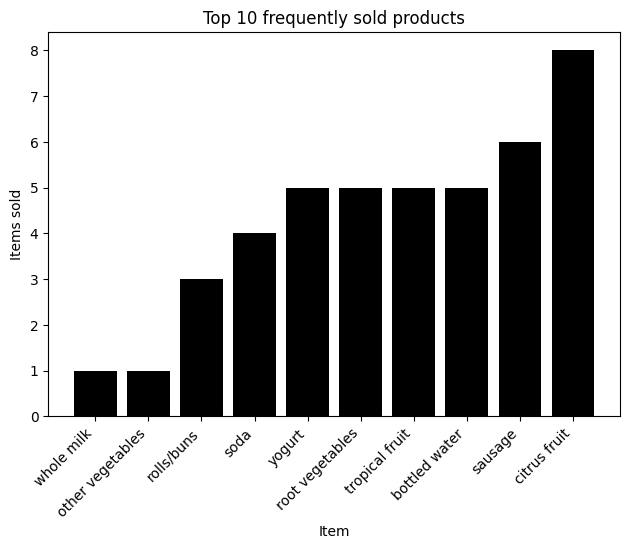

In [ ]:
plt.bar(x.index,y.values,color="black")
plt.xlabel("Item")
plt.ylabel("Items sold")
plt.title("Top 10 frequently sold products")
plt.tight_layout()
plt.xticks(rotation=45,ha="right")
plt.show()

In [ ]:
pd.DataFrame(file['Member_number'].value_counts().sort_values(ascending=False))[:10]

,Member_number
3180,36
3050,33
2051,33
3737,33
2625,31
3915,31
2433,31
2271,31
3872,30
2394,29


In [ ]:
file["Year"] = file['Date'].str.split("-").str[-1]

#Creating a new column in Month-Year format by splitting the date by - and filtering out the second and last value from the list which belongs to month and year respectively
file["Month-Year"] = file['Date'].str.split("-").str[1] + "-" + file['Date'].str.split("-").str[-1]

In [ ]:
file

,Member_number,Date,itemDescription,Year,Month-Year
0,1808,21-07-2015,tropical fruit,2015,07-2015
1,2552,05-01-2015,whole milk,2015,01-2015
2,2300,19-09-2015,pip fruit,2015,09-2015
3,1187,12-12-2015,other vegetables,2015,12-2015
4,3037,01-02-2015,whole milk,2015,02-2015
...,...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,2014,10-2014
38761,2022,23-02-2014,candy,2014,02-2014
38762,1097,16-04-2014,cake bar,2014,04-2014
38763,1510,03-12-2014,fruit/vegetable juice,2014,12-2014


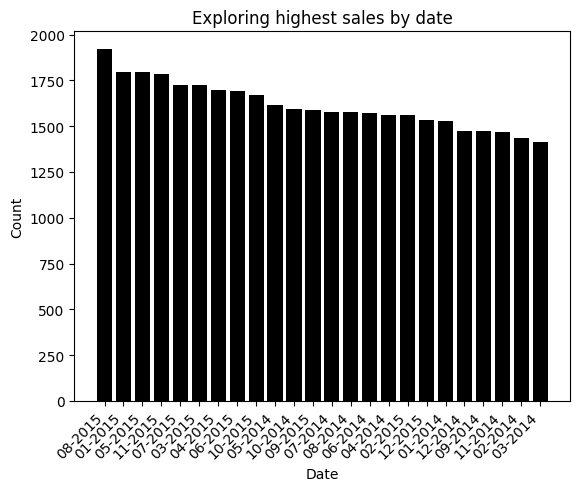

In [ ]:
import matplotlib.pyplot as plt

# Count transactions for each Month-Year
month_year_counts = file["Month-Year"].value_counts(ascending=False)

# Create a bar chart
plt.bar(month_year_counts.index, month_year_counts.values, color='black')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Exploring highest sales by date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()


In [ ]:
products =file['itemDescription'].unique()

In [ ]:
products[:10]

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken'], dtype=object)

In [ ]:
data1=file.copy()
one_hot = pd.get_dummies(data1['itemDescription'])
data1.drop(['itemDescription'], inplace =True, axis=1)

data1 = data1.join(one_hot)

data1.head()

,Member_number,Date,Year,Month-Year,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,07-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,01-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,09-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,02-2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
data2 = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

data2.head(3)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  

[3 rows x 167 columns]

In [ ]:
data2 = data2.reset_index()[products]
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def product_names(x):
    for product in products:
        if x[product] >0:
            x[product] = product
    return x
#Apply the created function on data2 dataset.
data2 = data2.apply(product_names, axis=1)
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = data2.values
#Convert into list values in each row if value is not zero
x = [sub[~(sub==0)].tolist() for sub in x if sub [sub != 0].tolist()]
transactions = x
transactions[0:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [ ]:
associations = apriori(transactions, min_support = 0.00030, min_confidence = 0.05, min_lift = 3, max_length = 2, target = "associations")
association_results = list(associations)
print(association_results[0])

RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])


In [ ]:
for item in association_results:

    #for each item filter out the item pair and create item list containing individual items in the itemset
    itemset = item[0]
    items = [x for x in itemset]

    #Print the relationship( First value in items to second value in items)
    print("Rule : ", items[0], " -> " + items[1])

    #Print support,confidence and lift value of each itemset
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))

    print("=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>")

Rule :  liver loaf  -> fruit/vegetable juice
Support :  0.00040098910646260775
Confidence :  0.12
Lift :  3.5276227897838903
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  pickled vegetables  -> ham
Support :  0.0005346521419501437
Confidence :  0.05970149253731344
Lift :  3.4895055970149254
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  meat  -> roll products 
Support :  0.0003341575887188398
Confidence :  0.06097560975609757
Lift :  3.620547812620984
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  misc. beverages  -> salt
Support :  0.0003341575887188398
Confidence :  0.05617977528089888
Lift :  3.5619405827461437
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  misc. beverages  -> spread cheese
Support :  0.0003341575887188398
Confidence :  0.05
Lift :  3.170127118644068
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>
Rule :  seasonal products  -> soups
Support :  0.0003341575887188398
Confidence :  0.10416666666666667
Lift :  14.704205974842768
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=